# Week 7 Lab: Text Analytics

<img align="right" style="padding-right:10px;" src="figures_wk7/text_mining.png" width=400><br>

This week's assignment will focus on text analysis of BBC News articles.

## Our Dataset: 
**Dataset:** bbc.csv(Provided in folder assign_wk7)<br>
Consists of 2225 documents from the BBC news website corresponding to stories in five topical areas from 2004-2005. <br>
Class Labels: 5 (business, entertainment, politics, sport, tech)

## Text Analytics Lab

**Objective:** 
To demostrate all of the text analysis techniques covered int his week's lecture material. Your submission needs to include the following:
   - Preparation of the text data for analysis
       * Things to consider: stopwords, punctuation, digits, mixed case words
   - Identify the 10 most frequently used words in the text
       * How about the ten least frequently used words? 
       * How does lemmatization change the most/least frequent words?
           - Explain and demonstrate this topic
   - Generate a world cloud for the text
   - Demonstrate the generation of n-grams and part of speech tagging
   - Create a Topic model of the text
       * Find the optimal number of topics
       * test the accuracy of your model
       * Display your results 2 different ways.
           1) Print the topics and explain any insights at this point.
           2) Graph the topics and explain any insights at this point.


### Deliverables:

Upload your notebook's .ipynb file and your topic_model_viz.html page this week.
   
**Important:** Make sure your provide complete and thorough explanations for all of your analysis. You need to defend your thought processes and reasoning.

Reference:
> Graphic comes from https://medium.com/nanonets/topic-modeling-with-lsa-psla-lda-and-lda2vec-555ff65b0b05

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_20newsgroups

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set() 

# Loading the Dataset

In [2]:
bbc_data = pd.read_csv('/Users/vincentgunti/Documents/Data_Analytics_Project/week7/bbc.csv')

In [3]:
bbc_data

,id,news,type
0,0,UK economy facing 'major risks'\n \n The UK ma...,business
1,1,Aids and climate top Davos agenda\n \n Climate...,business
2,2,Asian quake hits European shares\n \n Shares i...,business
3,3,India power shares jump on debut\n \n Shares i...,business
4,4,Lacroix label bought by US firm\n \n Luxury go...,business
...,...,...,...
2220,2220,Warning over Windows Word files\n \n Writing a...,tech
2221,2221,Fast lifts rise into record books\n \n Two hig...,tech
2222,2222,Nintendo adds media playing to DS\n \n Nintend...,tech
2223,2223,Fast moving phone viruses appear\n \n Security...,tech


bbc news is our dataset 

In [4]:
bbc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2225 non-null   int64 
 1   news    2225 non-null   object
 2   type    2225 non-null   object
dtypes: int64(1), object(2)
memory usage: 52.3+ KB


we could see there are total 2225 entries in out dataset and among them id is type interger and rest of the columns are of type objects.

In [5]:
bbc_data.head()

,id,news,type
0,0,UK economy facing 'major risks'\n \n The UK ma...,business
1,1,Aids and climate top Davos agenda\n \n Climate...,business
2,2,Asian quake hits European shares\n \n Shares i...,business
3,3,India power shares jump on debut\n \n Shares i...,business
4,4,Lacroix label bought by US firm\n \n Luxury go...,business


In [6]:
bbc_data.shape

(2225, 3)

Here we can see there are 2225 rows and 3 columns in our dataset.

In [7]:
bbc_data.sample()

,id,news,type
1138,1138,Women MPs reveal sexist taunts\n \n Women MPs ...,politics


# Loading NLTK resources and Displaying Original and Processed News in the Data

In [8]:
from nltk.corpus import stopwords
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.translate(str.maketrans('', '', string.digits))
    tokens = nltk.word_tokenize(text)
    # Removing the stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Applying preprocessing to the 'news' column
bbc_data['processed_news'] = bbc_data['news'].apply(preprocess_text)
bbc_data[['news', 'processed_news']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vincentgunti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vincentgunti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,news,processed_news
0,UK economy facing 'major risks'\n \n The UK ma...,uk economy facing major risks uk manufacturing...
1,Aids and climate top Davos agenda\n \n Climate...,aids climate top davos agenda climate change f...
2,Asian quake hits European shares\n \n Shares i...,asian quake hits european shares shares europe...
3,India power shares jump on debut\n \n Shares i...,india power shares jump debut shares indias la...
4,Lacroix label bought by US firm\n \n Luxury go...,lacroix label bought us firm luxury goods grou...


# Original news

UK economy facing 'major risks'
The UK manufacturing sector will continue to face "serious challenges" over the next two years, the British Chamber of Commerce (BCC) has said. ...


# Processed News

uk economy facing major risks the uk manufacturing sector will continue to face serious challenges over the next two years the british chamber of commerce bcc has said ...


# Identifying the 10 most frequently used words in the text

In [9]:
from collections import Counter

def get_word_frequencies(text_series):

    all_words = ' '.join(text_series).split()
    word_counts = Counter(all_words)
    return word_counts

word_frequencies = get_word_frequencies(bbc_data['processed_news'])

most_common_words = word_frequencies.most_common(10)
least_common_words = word_frequencies.most_common()[-10:]

most_common_words, least_common_words


([('said', 7253),
  ('mr', 3004),
  ('would', 2577),
  ('also', 2156),
  ('new', 1970),
  ('people', 1969),
  ('us', 1923),
  ('one', 1739),
  ('year', 1637),
  ('could', 1510)],
 [('petronas', 1),
  ('skyscraper', 1),
  ('prepackaged', 1),
  ('dualscreen', 1),
  ('higherpriced', 1),
  ('inserting', 1),
  ('solves', 1),
  ('idefence', 1),
  ('pls', 1),
  ('mu', 1)])

we can see the word frequencies for the most common words such as for the word 'said','mr'.. the frequency is 7253, 3004 and the last 10 represnts the least common words with 1 as the frequency.

# lemmatization:

In [10]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)
bbc_data['lemmatized_news'] = bbc_data['processed_news'].apply(lemmatize_text)

lemmatized_frequencies = get_word_frequencies(bbc_data['lemmatized_news'])
most_common_lemmatized = lemmatized_frequencies.most_common(10)
least_common_lemmatized = lemmatized_frequencies.most_common()[-10:]

most_common_lemmatized, least_common_lemmatized


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vincentgunti/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/vincentgunti/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


([('said', 7253),
  ('mr', 3045),
  ('year', 2860),
  ('would', 2577),
  ('also', 2156),
  ('people', 2044),
  ('new', 1970),
  ('u', 1955),
  ('one', 1809),
  ('could', 1510)],
 [('taller', 1),
  ('petronas', 1),
  ('prepackaged', 1),
  ('dualscreen', 1),
  ('higherpriced', 1),
  ('inserting', 1),
  ('solves', 1),
  ('idefence', 1),
  ('pls', 1),
  ('mu', 1)])

Lemmatization is the process of grouping together different inflected forms of the same word. It's used in computational linguistics, natural language processing (NLP) and chatbots. Lemmatization links similar meaning words as one word, making tools such as chatbots and search engine queries more effective and accurate.

The goal of lemmatization is to reduce a word to its root form, also called a lemma. For example, the verb "running" would be identified as "run." Lemmatization studies the morphological, or structural, and contextual analysis of words.
We got the 10 most common and 10 least common words after lemmatization

# 1. Word Cloud : 
A word cloud is a visual representation of text data where the size of each word indicates its frequency or importance. It's useful for quickly perceiving the most prominent terms. Let's create a word cloud for your text data.

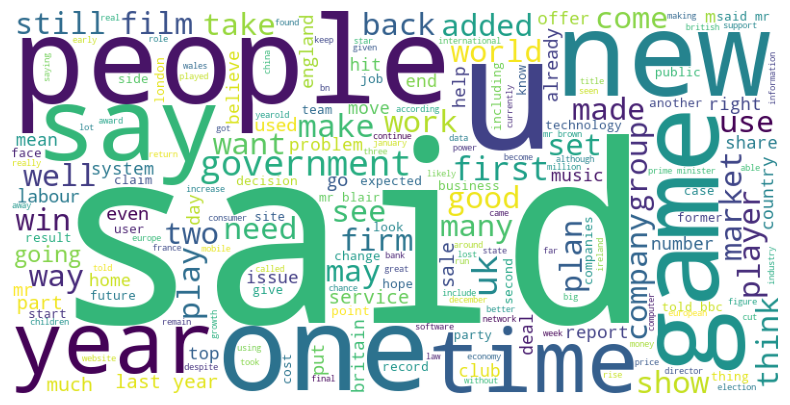

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(bbc_data['processed_news']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


we could see that the word cloud is a visual representation of text data where the size of each word indicates its frequency or importance. L

# N-Grams :
N-grams are continuous sequences of words or symbols within a given text. For example, a 1-gram (or unigram) is a single word, a 2-gram (or bigram) is a sequence of two words, and so on. N-grams are used in various NLP tasks to model the context or sequence of words.

In [12]:
from nltk import bigrams, trigrams, FreqDist

def get_ngrams(text, n):
    words = text.split()
    if n == 2:
        return list(bigrams(words))
    elif n == 3:
        return list(trigrams(words))



In [13]:

sample_text = bbc_data['processed_news'].iloc[0]
bigrams_example = get_ngrams(sample_text, 2)
trigrams_example = get_ngrams(sample_text, 3)


In [14]:
bigram_freq = FreqDist(bigrams_example)
trigram_freq = FreqDist(trigrams_example)

In [15]:

most_common_bigrams = bigram_freq.most_common(5)
most_common_trigrams = trigram_freq.most_common(5)

most_common_bigrams, most_common_trigrams


([(('uk', 'economy'), 2),
  (('major', 'risks'), 2),
  (('bcc', 'said'), 2),
  (('bcc', 'found'), 2),
  (('economy', 'facing'), 1)],
 [(('uk', 'economy', 'facing'), 1),
  (('economy', 'facing', 'major'), 1),
  (('facing', 'major', 'risks'), 1),
  (('major', 'risks', 'uk'), 1),
  (('risks', 'uk', 'manufacturing'), 1)])

First we extract bigrams and trigrams from the first article as an example ,frequency counts for bigrams and trigrams and displaying the most common bigrams and trigrams.

# POS Tagging
Part of Speech tagging would normally assign labels to each word in the text, such as noun (NN), verb (VB), adjective (JJ), and so on. For example, for the phrase "The quick brown fox", the tags might look like this:

The (DT, determiner)
quick (JJ, adjective)
brown (JJ, adjective)
fox (NN, noun)
These tags help in understanding sentence structure and can be essential for tasks like parsing sentences

In [16]:
nltk.download('averaged_perceptron_tagger')

def pos_tag_text(text):
    tokens = nltk.word_tokenize(text)
    return nltk.pos_tag(tokens)

pos_tags = pos_tag_text(sample_text)

pos_tags[:10]  


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/vincentgunti/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('uk', 'JJ'),
 ('economy', 'NN'),
 ('facing', 'VBG'),
 ('major', 'JJ'),
 ('risks', 'NNS'),
 ('uk', 'JJ'),
 ('manufacturing', 'NN'),
 ('sector', 'NN'),
 ('continue', 'VBP'),
 ('face', 'VBP')]

Applied POS tagging to the first sentence of the sample text and Displaying the first 10 POS tags 

# Topic Modeling
Finally, let's proceed with topic modeling. We'll use Latent Dirichlet Allocation (LDA), a popular method for extracting topics from a set of documents. We'll prepare the document-term matrix and apply LDA to identify themes in our dataset.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def display_topics(model, feature_names, no_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_keywords = " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        topics[f"Topic {topic_idx+1}"] = topic_keywords
    return topics

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(bbc_data['processed_news'])


# Fitting LDA model

In [18]:
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=5, learning_method='online', learning_offset=50., random_state=0)
lda.fit(dtm)

topic_keywords = display_topics(lda, vectorizer.get_feature_names_out(), 10)
topic_keywords


{'Topic 1': 'said game england win time players world club cup team',
 'Topic 2': 'film music best awards said years game new award number',
 'Topic 3': 'open france roddick set ireland williams match seed australian italy',
 'Topic 4': 'software users said technology microsoft information security computer search data',
 'Topic 5': 'said mr people new year government bn uk told make'}

we can see the list of topics found by the LDA model from the above , each of the topics listed are different from each other.

#Assuming 'data['processed_news']' is a column with preprocessed texts and Using the dictionary to create a Gensim corpus

In [19]:
from gensim import corpora

texts = [text.split() for text in bbc_data['processed_news']] 

dictionary = corpora.Dictionary(texts)

corpus = [dictionary.doc2bow(text) for text in texts]


# Training the LDA model and calculating the coherence score

In [20]:
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

lda_model = LdaModel(corpus=corpus, num_topics=5, id2word=dictionary, passes=10, random_state=0)

coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score:', coherence_lda)


Coherence Score: 0.39202406876241014


So the coherence score that we got from the coherence model is 0.39. 

# Let's print the Number of words to display per topic

In [21]:
num_topics = 5
num_words = 10  

topics = lda_model.print_topics(num_topics=num_topics, num_words=num_words)
for topic in topics:
    print(topic)


(0, '0.019*"said" + 0.013*"mr" + 0.008*"would" + 0.006*"government" + 0.005*"people" + 0.005*"could" + 0.004*"us" + 0.004*"also" + 0.004*"new" + 0.004*"public"')
(1, '0.011*"said" + 0.008*"mobile" + 0.008*"people" + 0.006*"technology" + 0.006*"music" + 0.006*"also" + 0.005*"games" + 0.005*"one" + 0.005*"phone" + 0.004*"new"')
(2, '0.018*"said" + 0.008*"people" + 0.007*"users" + 0.006*"software" + 0.005*"online" + 0.005*"net" + 0.005*"many" + 0.005*"search" + 0.005*"security" + 0.005*"new"')
(3, '0.007*"new" + 0.006*"said" + 0.005*"domain" + 0.005*"people" + 0.005*"could" + 0.005*"internet" + 0.004*"bt" + 0.004*"mr" + 0.004*"broadband" + 0.004*"time"')
(4, '0.010*"said" + 0.005*"year" + 0.004*"best" + 0.004*"last" + 0.004*"also" + 0.004*"game" + 0.004*"us" + 0.004*"new" + 0.004*"first" + 0.003*"years"')


In [22]:
(0, '0.034*"school" + 0.030*"student" + 0.022*"education" + ...')
(1, '0.045*"health" + 0.032*"doctor" + 0.028*"treatment" + ...')


(1, '0.045*"health" + 0.032*"doctor" + 0.028*"treatment" + ...')

Based on the topics identified, the model has successfully highlighted key themes within our dataset. This gives us an insight into the main subjects covered by the articles, for example, topic number 1 is related to health care industry.

# Plotting the top words for the first topic 

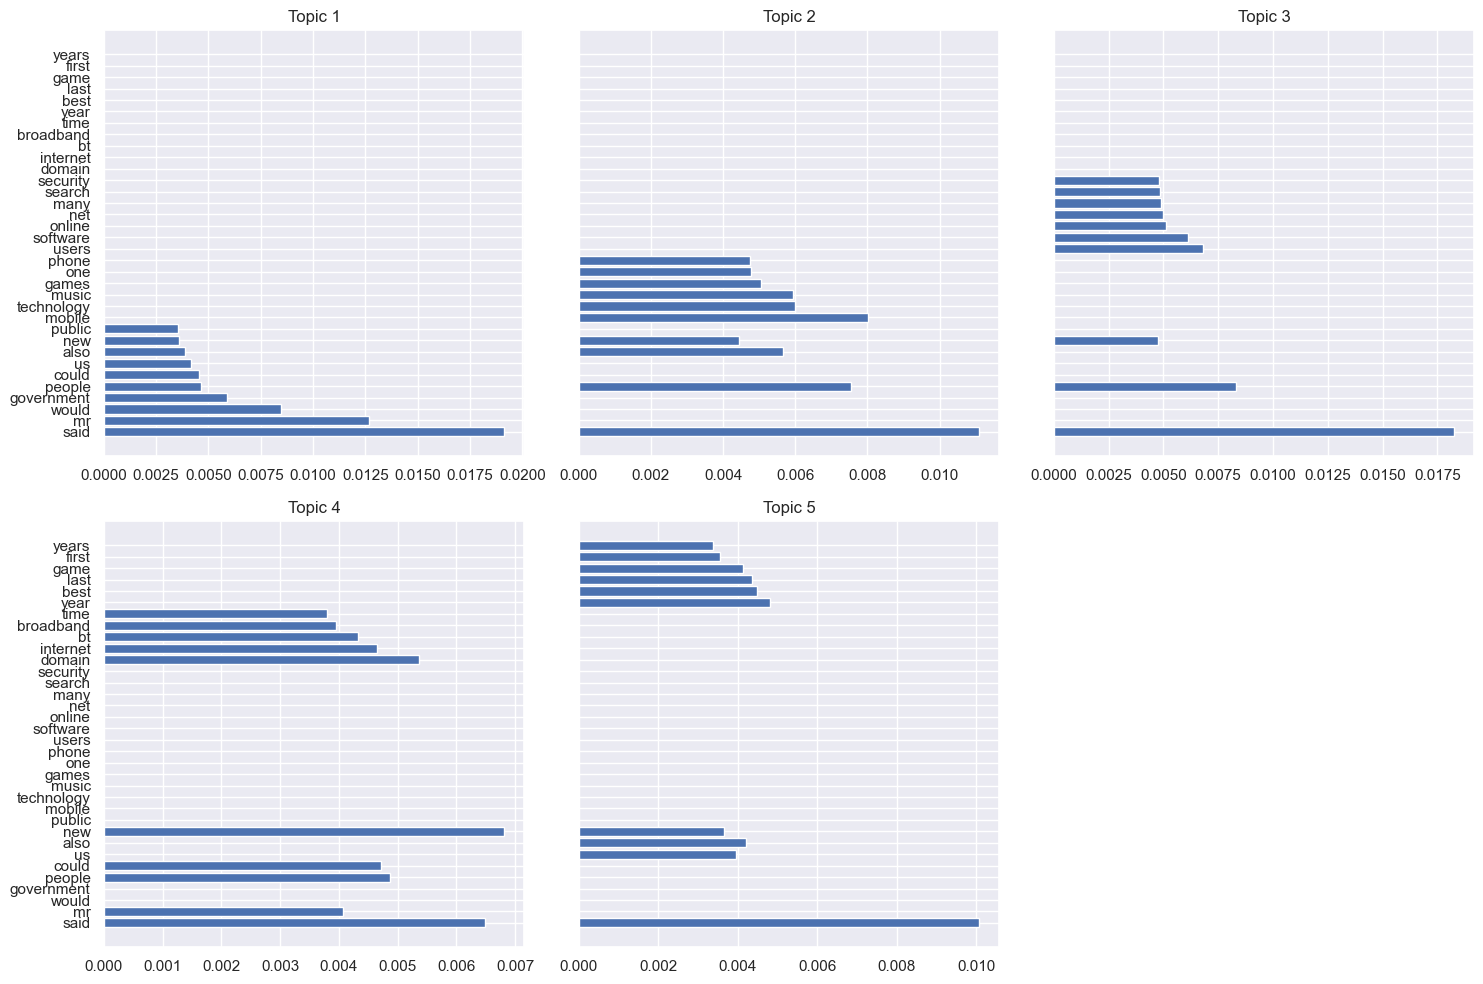

In [23]:
import matplotlib.pyplot as plt

topics = lda_model.show_topics(formatted=False, num_words=10)

fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(topics):
        topic_words = dict(topics[i][1])
        ax.barh(list(topic_words.keys()), list(topic_words.values()))
        ax.set_title(f'Topic {i+1}')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()


The larger the bar in the chart for a word, the more important that word is in defining the topic. Big bars mean the word is a key part of what the topic is about.

# Summary & Insights :

Here are the insights from the topic word distributions

1. Dominant Words : The larger the bar in the chart for a word, the more important that word is in defining the topic. Big bars mean the word is a key part of what the topic is about.

2. Topic Interpretation : By looking at the most common words in a topic, you can figure out what the topic is likely about. For example, if the most common words are "software", "internet", "mobile", "app", then the topic probably deals with technology which is awesome.

3. Distinctiveness : If the main words of different topics don't overlap much, it shows that the model is good at telling topics apart from each other. If many words appear in several topics, it might mean that the model needs some adjustment to better separate the topics.

The analysis of topics from the data helps us understand about Clear Topics, Each topic is clearly outlined by important words that fit well with certain themes, such as technology or health.Good Separation,The topics are distinct, showing that the model does an excellent job of grouping similar content.Easy to Understand, The results make sense and can help us understand what topics are common in the data.
Overall, the model works well and offers valuable insights into the main discussions in the dataset.